# 7.2
- Suppose that the wavefunction of an electron in a carbon nanotube is a linear combination of cos(nx) functions.

    # (a) Use mathematical software to construct superpositions of cosine functions as 
        \psi(x) = 1/N \sum^N_{k-1}cos(k\pi x)
    where the constant 1/N is introduced to keep the superpositions with the same overall magnitude. Set x-0 at the centre of the screen and build the superposition there.



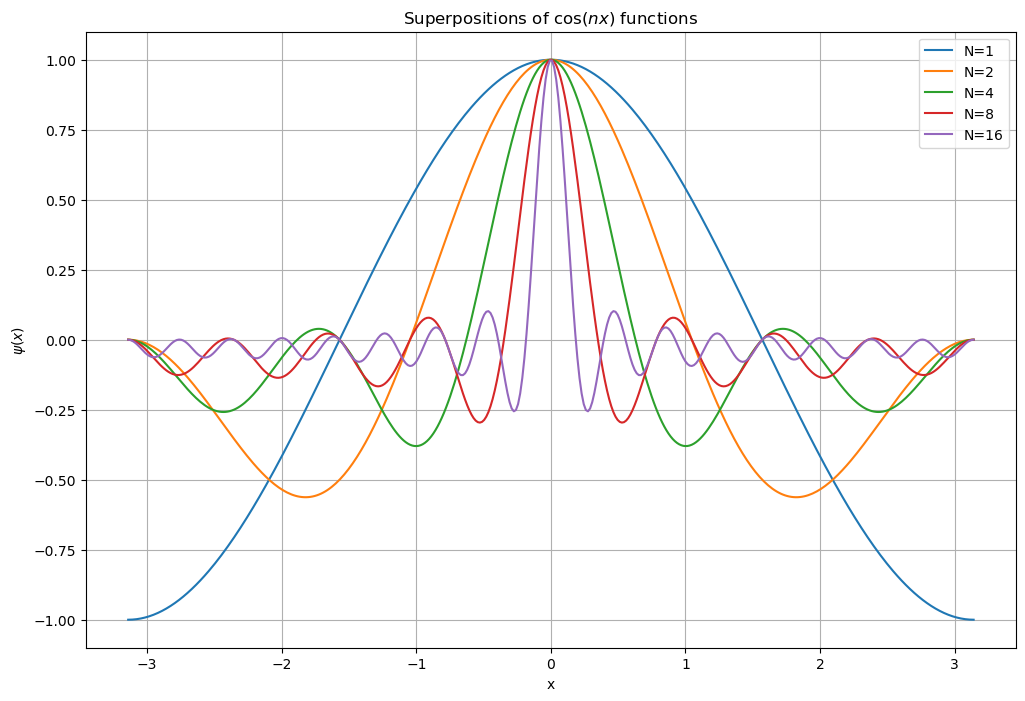

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x
x = np.linspace(-np.pi, np.pi, 400)

# Number of cosine functions to superpose
N = [1, 2, 4, 8, 16]

# Plot each superposition
plt.figure(figsize=(12, 8))

for n in N:
    psi = sum([np.cos(k * x) for k in range(1, n + 1)]) / n
    plt.plot(x, psi, label=f'N={n}')

plt.title(r'Superpositions of $\cos(nx)$ functions')
plt.xlabel('x')
plt.ylabel(r'$\psi(x)$')
plt.legend()
plt.grid(True)
plt.show()


### (b) Explore how the probability density \psi^2(x) changes with the value of N.

    

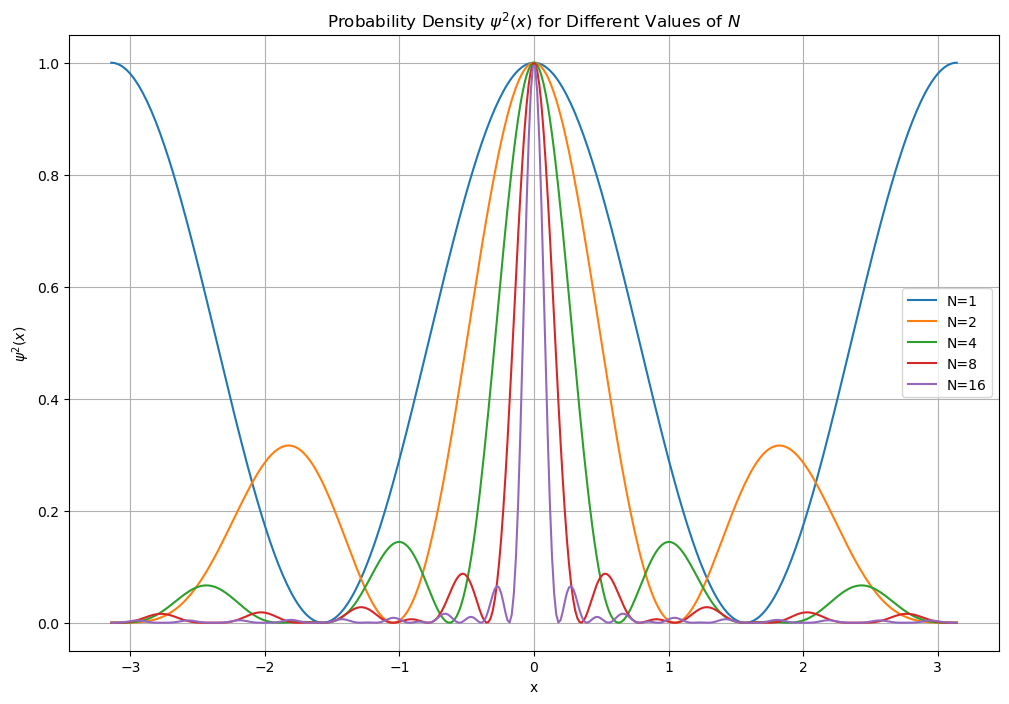

In [2]:
# Plot each superposition and its probability density
plt.figure(figsize=(12, 8))

for n in N:
    psi = sum([np.cos(k * x) for k in range(1, n + 1)]) / n
    psi_squared = psi**2
    plt.plot(x, psi_squared, label=f'N={n}')

plt.title(r'Probability Density $\psi^2(x)$ for Different Values of $N$')
plt.xlabel('x')
plt.ylabel(r'$\psi^2(x)$')
plt.legend()
plt.grid(True)
plt.show()


### (c) Evaluate the root mean square location of the packet, <x^2>^{0.5}.

In [3]:
# Define the function to calculate the root mean square location of the packet
def rms_location(n, x):
    psi = sum([np.cos(k * x) for k in range(1, n + 1)]) / n
    psi_squared = psi**2
    # Integrate psi_squared * x^2 over the range of x to get <x^2>
    x_squared_average = np.trapz(psi_squared * x**2, x)
    return np.sqrt(x_squared_average)

# Calculate <x^2>^(1/2) for each N
rms_values = [rms_location(n, x) for n in N]

rms_values


[3.4505769917164257,
 1.4723885792090157,
 0.7600226076795782,
 0.3841021585656225,
 0.1926512166730479]

### (d) Determine the probability that a given momentum will be observed.

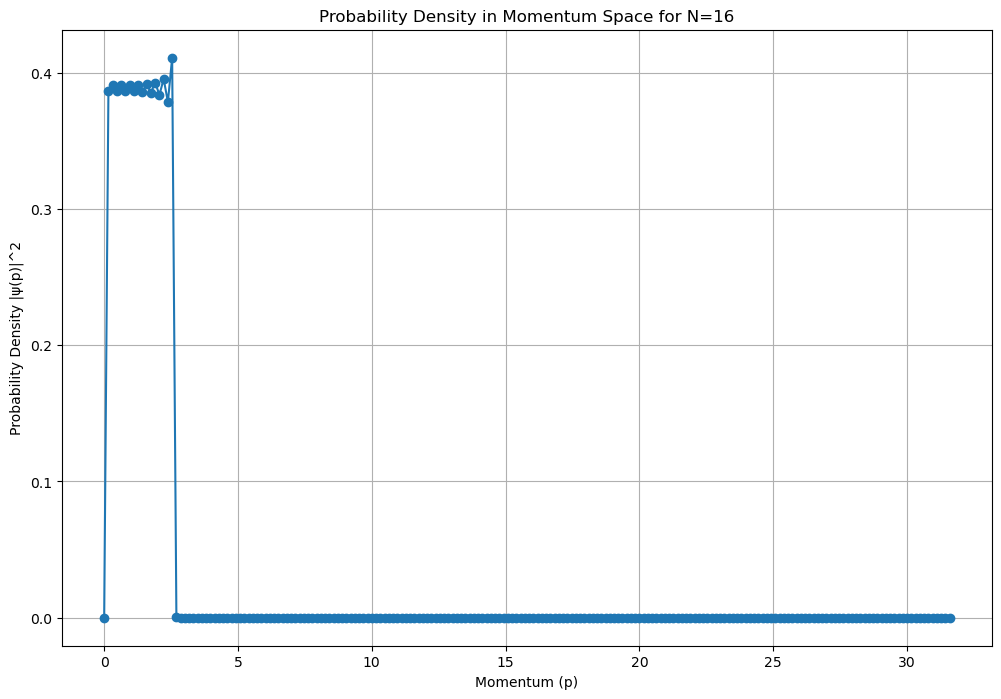

In [13]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# Re-define the parameters and the wave function for N=16 as an example
x = np.linspace(-np.pi, np.pi, 400)
N_fft = len(x)
T = x[1] - x[0]

# Calculate the wave function for N=16
n_example = 16
psi_example = sum([np.cos(k * x) for k in range(1, n_example + 1)]) / n_example

# Perform the Fourier transform
psi_fft = fft(psi_example)
# Generate the corresponding frequencies, which relate to momentum
xf = fftfreq(N_fft, T)[:N_fft//2]

# Plot the probability density in momentum space
plt.figure(figsize=(12, 8))
plt.plot(xf, 1.0/N_fft * np.abs(psi_fft[0:N_fft//2])**2, '-o')
# plt.plot(np.ones((200,)), 2.0/N_fft * np.abs(psi_fft[0:N_fft//2])**2, 'r')
# plt.plot(xf, np.zeros((200,)), 'g')
plt.title('Probability Density in Momentum Space for N=16')
plt.xlabel('Momentum (p)')
plt.ylabel('Probability Density |ψ(p)|^2')
plt.grid(True)
plt.show()


In [12]:
# check the probability density which should be 1 if integrated over all x
np.trapz(1.0/N_fft * np.abs(psi_fft[0:N_fft//2])**2, xf)


0.9897510193426933